# 5 Capstone II Modeling

# 5.1 Imports

In [1]:
import os
from library.sb_utils import save_file

import pandas as pd
import numpy as np

import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate

# 5.2 Load Model

In [2]:
expected_model_version = '1.0'
model_path = '../models/refinery_crackspread_model_B.pkl'

if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

Expected model version doesn't match version loaded


# 5.3 Load Data

## 5.3.1 Profiles Data

In [244]:
# Load the data
data = pd.read_csv('../data/data_step3_features.csv')

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RFY-PADD            969 non-null    object 
 1   RFY-PAD-Sub         969 non-null    object 
 2   RFY-PAD-District    969 non-null    object 
 3   RFY_ID              969 non-null    object 
 4   RFY_BPCD            969 non-null    int64  
 5   CATCRKRECYL         969 non-null    float64
 6   CATHYDRCRCK         969 non-null    float64
 7   CATHYDTRMT          969 non-null    float64
 8   CATLREFORM          969 non-null    float64
 9   CATLYTCRCK          969 non-null    float64
 10  COKING              969 non-null    float64
 11  FUELSOLDEASP        969 non-null    float64
 12  THERMCRCK           969 non-null    float64
 13  VACMDIST            969 non-null    float64
 14  Crude_API           969 non-null    float64
 15  NG_Yield_PAD        969 non-null    float64
 16  GSL_Yiel

In [275]:
# Separate the fictional observations into its own dataframe
falcon_data = data[data['RFY_ID'] == 'RFY-201']

In [276]:
falcon_data.iloc[:,[23,20,14,2,4,19,56,59,62,38]]

,Brent_Diff,WTI_Diff,Crude_API,RFY-PAD-District,RFY_BPCD,WTI_Price,PAD-2-2,PAD-3-3,PAD-4,SPECF_RFY_CRCK
968,-2.078182,-6.049091,26.115455,PAD-2-2,50000,38.519091,1,0,0,26.480953


In [7]:
# Separate the actual observations into another dataframe
rfy_data = data.iloc[np.r_[0:968], :]

In [8]:
# check the last observation to verify that the rfy_data does not include the Falcon Refinery data
rfy_data.tail(1)

,RFY-PADD,RFY-PAD-Sub,RFY-PAD-District,RFY_ID,RFY_BPCD,CATCRKRECYL,CATHYDRCRCK,CATHYDTRMT,CATLREFORM,CATLYTCRCK,...,MRKT_RESIST_PAD-3,MRKT_RESIST_PAD-4,MRKT_RESIST_PAD-5,REVNUE_PAD-1A,REVNUE_PAD-1B,REVNUE_PAD-1C,REVNUE_PAD-2,REVNUE_PAD-3,REVNUE_PAD-4,REVNUE_PAD-5
967,PAD-4,PAD-4,PAD-4,RFY-132,3000,51762.720398,139.162137,4209.829462,42234.659531,8958.125484,...,0.15758,0.052905,0.154692,52.631535,57.25055,57.844057,57.129244,53.547274,58.936798,66.45891


### Dependent Variable

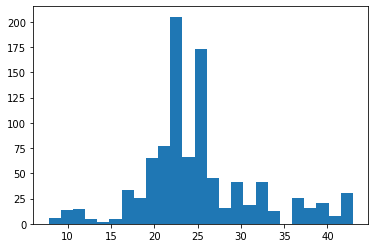

In [9]:
_ = plt.hist(rfy_data['SPECF_RFY_CRCK'], bins=25)

In [10]:
rfy_data['SPECF_RFY_CRCK'].describe()

count    968.000000
mean      25.100242
std        6.692318
min        7.786307
25%       21.839709
50%       24.133443
75%       26.428742
max       42.940409
Name: SPECF_RFY_CRCK, dtype: float64

In [11]:
rfy_data['SPECF_RFY_CRCK'].value_counts()

25.983769    5
22.555106    5
23.117531    5
24.257179    5
24.966581    5
            ..
25.339587    1
33.695715    1
24.983023    1
24.276360    1
38.878956    1
Name: SPECF_RFY_CRCK, Length: 823, dtype: int64

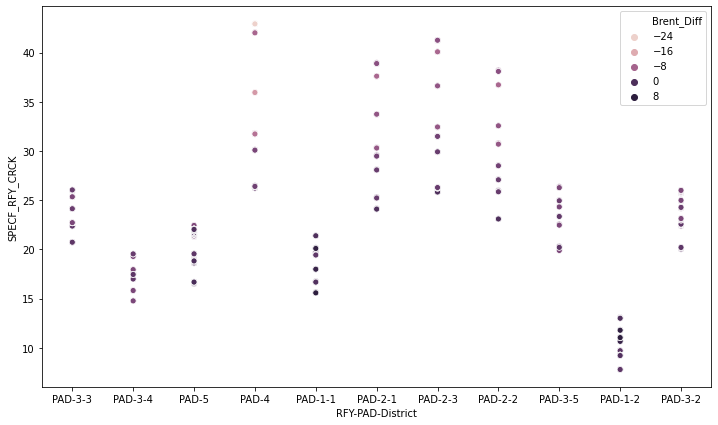

In [12]:
plt.figure(figsize=(12,7))
_ = sns.scatterplot(x='RFY-PAD-District', y='SPECF_RFY_CRCK', hue='Brent_Diff', data=rfy_data)

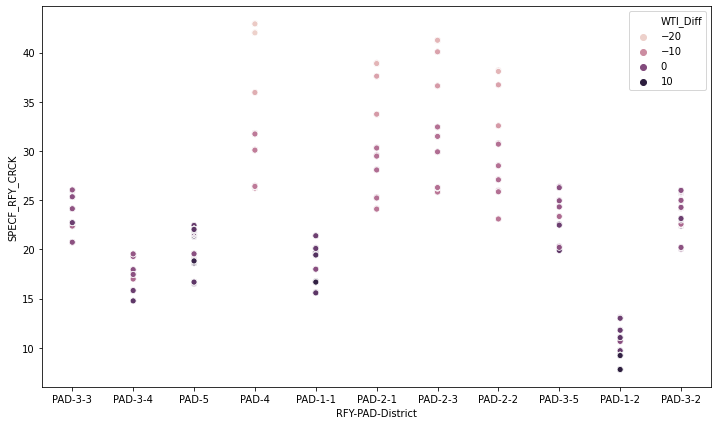

In [13]:
plt.figure(figsize=(12,7))
_ = sns.scatterplot(x='RFY-PAD-District', y='SPECF_RFY_CRCK', hue='WTI_Diff', data=rfy_data)

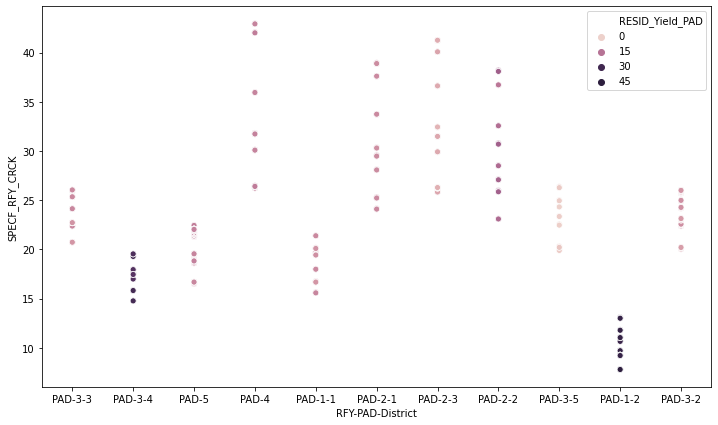

In [14]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='RFY-PAD-District', y='SPECF_RFY_CRCK', hue='RESID_Yield_PAD', data=rfy_data)

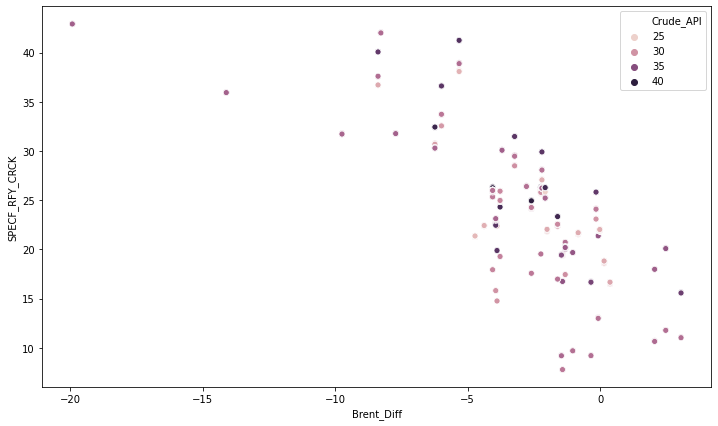

In [15]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Brent_Diff', y='SPECF_RFY_CRCK', hue='Crude_API', data=rfy_data)

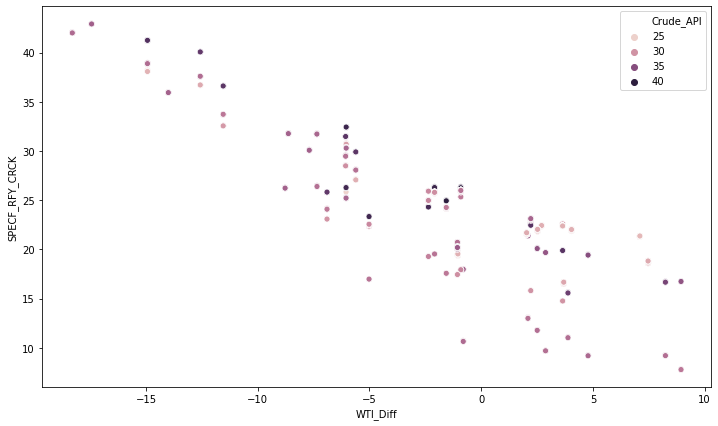

In [16]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='WTI_Diff', y='SPECF_RFY_CRCK', hue='Crude_API', data=rfy_data)

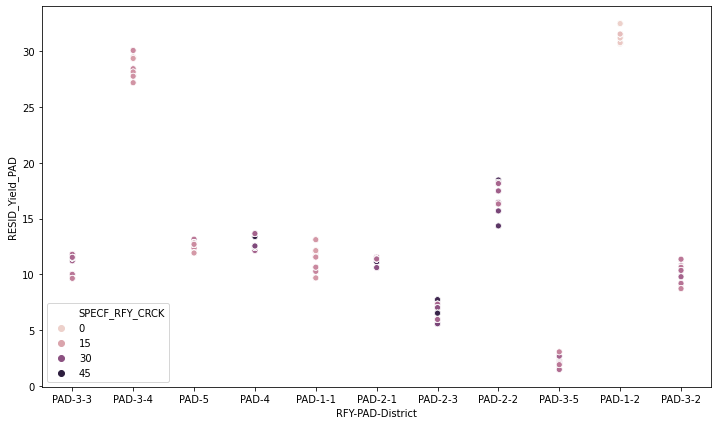

In [17]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='RFY-PAD-District', y='RESID_Yield_PAD', hue='SPECF_RFY_CRCK', data=rfy_data)

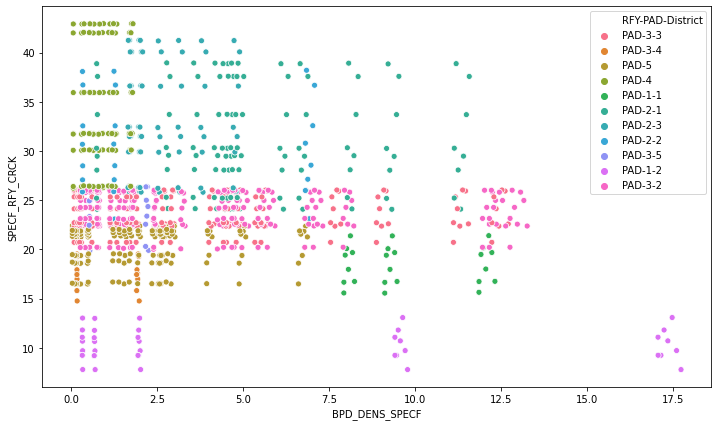

In [18]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='BPD_DENS_SPECF', y='SPECF_RFY_CRCK', hue='RFY-PAD-District', data=rfy_data)

The above chart show a pattern:
- The bigger discounts are on either the imported Brent or domestic WTI Crude, the better things are for refineries, as they are able to purchase Crude Oil at a lower price and hence, make a bigger profit margin (Net Crack Spread)
- The lower the Residue Yield (RESID_Yield_PAD) in a given refinery indicate that higher light product yields are achieved, leading to higher value sales, and ultimately - to a higher Net Crack Spread
- Refineries with consistently high level profit margins are located in the following PAD Districts: PAD-4, PAD-2-3, PAD-2-1, and PAD-2-2 - in that descending order.
- Lastly, the type of crude oil also plays a noticeable role in the refinery profit margins: the higher the API, the higher the light product yields. Combined with favorable refinery location, with close proximity to denser markets, the higher light product yields allow PAD-4, PAD-2-3, PAD-2-1, and PAD-2-2 to become more profitable than others.

## 5.3.2 Refit Model on All Refinery Data

In [19]:
X = data.loc[data['RFY_ID'] != 'RFY-201', model.X_columns]
y = data.loc[data['RFY_ID'] != 'RFY-201', 'SPECF_RFY_CRCK']

In [20]:
len(X), len(y)

(968, 968)

In [21]:
model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=54, random_state=47))])

In [22]:
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [23]:
cv_results['test_score']

array([-1.7488155 , -1.15751301, -1.246086  , -3.25102506, -1.41993562])

In [24]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(1.7646750371150433, 0.7701835494283248)

# 5.4 Calculate Expected Falcon crack spread

In [25]:
X_falcon = data.loc[data['RFY_ID'] == 'RFY-201', model.X_columns]
y_falcon = data.loc[data['RFY_ID'] == 'RFY-201', 'SPECF_RFY_CRCK']

In [26]:
len(X_falcon), len(y_falcon)

(1, 1)

In [27]:
falcon_pred = model.predict(X_falcon).item()

In [28]:
y_falcon = y_falcon.values.item()

In [29]:
falcon_pred, y_falcon

(25.966974602057316, 26.480953001692168)

In [30]:
print(f'Falcon Refinery 201 modeled crackspread is ${falcon_pred:.2f}, actual crackspread is ${y_falcon:.2f}.')
print(f'The expected mean absolute error of ${mae_mean:.2f}, the model prediction pretty much matches the financial model target.')

Falcon Refinery 201 modeled crackspread is $25.97, actual crackspread is $26.48.
The expected mean absolute error of $1.76, the model prediction pretty much matches the financial model target.


## 5.4.1 Metrics

In [31]:
# Falcon Refinery 201 position in the distribution

def plot_compare(feat_name, description, rfy_PAD_district=None, figsize=(7, 4)):
    """Graphically compare distributions of features.
    
    Plot histogram of values for all refineries and reference line to mark
    the position of Falcon Refinery 201.
    
    Arguments:
    feat_name - the feature column name in the data
    description - text description of the feature
    rfy_PAD_district - select a specific PAD District (None for all districts)
    figsize - (optional) figure size
    """
    
    plt.subplots(figsize=figsize)
    # quirk that hist sometimes objects to NaNs, sometimes doesn't
    # filtering only for finite values tidies this up
    
    if rfy_PAD_district is None:
        rfy_x = data[feat_name]
    else:
        rfy_x = data.loc[data['RFY-PAD-District'] == rfy_PAD_district, feat_name]
    rfy_x = rfy_x[np.isfinite(rfy_x)]
    plt.hist(rfy_x, bins=30)
    plt.axvline(x=falcon_data[feat_name].values, c='r', ls='--', alpha=0.8, label='Falcon Refinery')
    plt.xlabel(description)
    plt.ylabel('frequency')
    plt.title(description + ' distribution for refineries in market share')
    plt.legend()

### 5.4.1.1 Crack spread

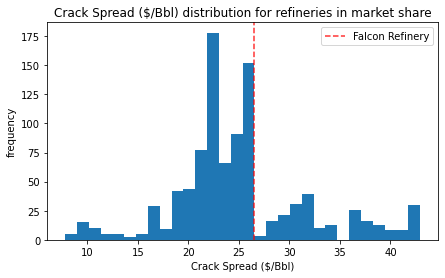

In [32]:
plot_compare('SPECF_RFY_CRCK', 'Crack Spread ($/Bbl)')

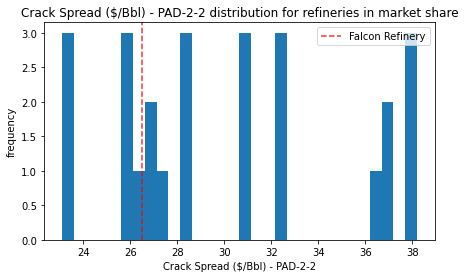

In [33]:
plot_compare('SPECF_RFY_CRCK', 'Crack Spread ($/Bbl) - PAD-2-2', rfy_PAD_district='PAD-2-2')

### 5.4.1.2 Brent Price Differential

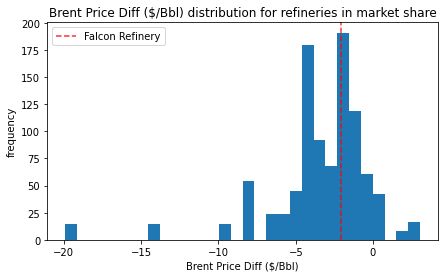

In [34]:
plot_compare('Brent_Diff', 'Brent Price Diff ($/Bbl)')

### 5.4.1.3 WTI Price Differential

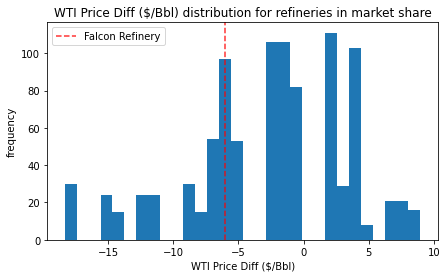

In [35]:
plot_compare('WTI_Diff', 'WTI Price Diff ($/Bbl)')

### 5.4.1.4 Residue Yield

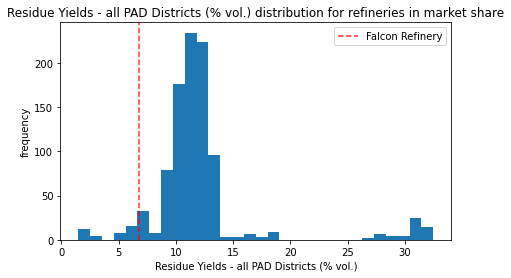

In [36]:
plot_compare('RESID_Yield_PAD', 'Residue Yields - all PAD Districts (% vol.)')

### 5.4.1.5 Light Product Yields (Gasoline, Diesel, Residual)

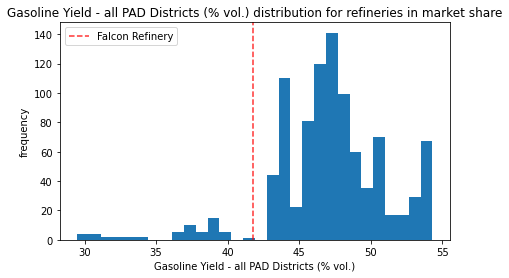

In [37]:
plot_compare('GSL_Yield_PAD', 'Gasoline Yield - all PAD Districts (% vol.)')

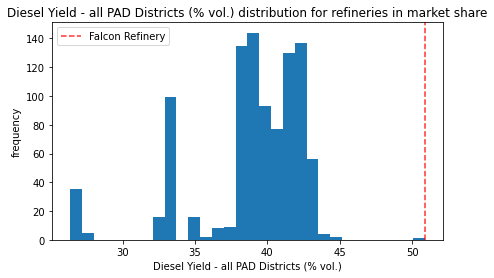

In [38]:
plot_compare('DSL_Yield_PAD', 'Diesel Yield - all PAD Districts (% vol.)')

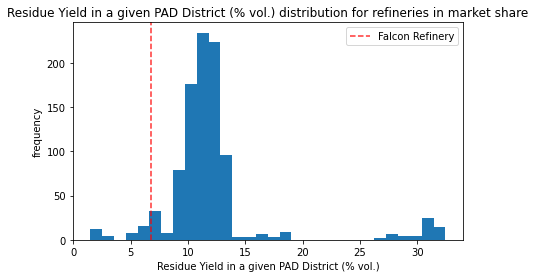

In [39]:
plot_compare('RESID_Yield_PAD', 'Residue Yield in a given PAD District (% vol.)')

### 5.4.1.6 Crude API

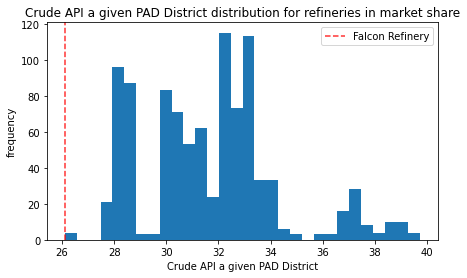

In [40]:
plot_compare('Crude_API', 'Crude API a given PAD District')

# 5.5. Models

## 5.5.1 Modeling scenarios

We will run several scenarios for the prospect refinery by changing key features:
1. Change Brent Price Differntial - make the effective price lower, by increasing diff from USD(2.078)/Bbl to USD(5.50)/Bbl
2. Change Crude API - make it lighter, from API 26 to API 39
3. Change the refinery location - move from PAD-2-2 to PAD-4 District
4. To conclude - run a combination of all three scenarios.

In [41]:
# Make a function for accepting variables for feature changes,
# running a new prediction and comparing to the current prediction

def predict_changes(features, changes):
    falcon_changed = X_falcon.copy()
    for f, d in zip(features, changes):
        falcon_changed[features] = changes
    return model.predict(falcon_changed).item() - model.predict(X_falcon).item()    

### Random Forest Baseline Prediction
***Confirm Predicted Falcon Refinery Crackspread***

In [277]:
falcon_data.iloc[:,[23,20,14,2,4,19,56,59,62,38]]

,Brent_Diff,WTI_Diff,Crude_API,RFY-PAD-District,RFY_BPCD,WTI_Price,PAD-2-2,PAD-3-3,PAD-4,SPECF_RFY_CRCK
968,-2.078182,-6.049091,26.115455,PAD-2-2,50000,38.519091,1,0,0,26.480953


In [278]:
# predict Falcon Refinery Crackspread:
X_falcon = data.loc[data['RFY_ID'] == 'RFY-201', model.X_columns]
y_falcon = data.loc[data['RFY_ID'] == 'RFY-201', 'SPECF_RFY_CRCK']

In [279]:
# This is the Random Forest prediction results - use this as the base case comparing with outcomes from Scenario changes
falcon_pred = model.predict(X_falcon).item()

In [280]:
y_falcon = y_falcon.values.item()

In [281]:
falcon_pred, y_falcon

(25.966974602057316, 26.480953001692168)

### Baseline RF dataset

In [282]:
# Financial model forecasted values
falcon_data[['Brent_Diff', 'WTI_Diff', 'Crude_API','RFY-PAD-District', 'PAD-2-2','PAD-4','SPECF_RFY_CRCK']]

,Brent_Diff,WTI_Diff,Crude_API,RFY-PAD-District,PAD-2-2,PAD-4,SPECF_RFY_CRCK
968,-2.078182,-6.049091,26.115455,PAD-2-2,1,0,26.480953


In [283]:
# The Baseline Random Forest predicted values
Baseline_RF = falcon_data.copy()
Baseline_RF[['SPECF_RFY_CRCK']] = falcon_pred
Baseline_RF.iloc[:,[23,20,14,2,4,19,56,59,62,38]]

,Brent_Diff,WTI_Diff,Crude_API,RFY-PAD-District,RFY_BPCD,WTI_Price,PAD-2-2,PAD-3-3,PAD-4,SPECF_RFY_CRCK
968,-2.078182,-6.049091,26.115455,PAD-2-2,50000,38.519091,1,0,0,25.966975


### 5.5.1.1 Scenario 1

#### Change Brent Price Differential 

In [290]:
# here's the current Brent_Diff value for Falcon
Baseline_RF['Brent_Diff'].item()

-2.078181818181811

In [291]:
falcon_df_changed = Baseline_RF.copy()

In [377]:
falcon_df_changed['Brent_Diff'] = -5.5
falcon_df_changed['WTI_Diff'] = 0
falcon_df_changed.iloc[:,[23,20,14,2,4,19,56,59,62,38]]

,Brent_Diff,WTI_Diff,Crude_API,RFY-PAD-District,RFY_BPCD,WTI_Price,PAD-2-2,PAD-3-3,PAD-4,SPECF_RFY_CRCK
968,-5.5,0,26.115455,PAD-2-2,50000,38.519091,1,0,0,25.966975


In [378]:
X_falcon_01 = falcon_df_changed.loc[falcon_df_changed['RFY_ID'] == 'RFY-201', model.X_columns]
y_falcon_01 = falcon_df_changed.loc[falcon_df_changed['RFY_ID'] == 'RFY-201', 'SPECF_RFY_CRCK']

In [379]:
len(X_falcon_01), len(y_falcon_01)

(1, 1)

In [380]:
falcon_pred_01 = model.predict(X_falcon_01).item()

In [381]:
y_falcon_01 = y_falcon_01.values.item()

In [382]:
falcon_pred_01, y_falcon_01

(34.663535773073846, 25.966974602057316)

### Scenario 1 Outcome:

Lowering Brent Differential by 1.00/Bbl results in dropping of Net Crack from 25.97/Bbl to 22.99/Bbl

In [104]:
print(f'Scenario 01 modeled crackspread is ${falcon_pred_01:.2f}, \
currently assumed crackspread is ${y_falcon_01:.2f}.')

Scenario 01 modeled crackspread is $22.99, currently assumed crackspread is $25.97.


### 5.5.1.2 Scenario 2

#### Change Crude API

In [418]:
falcon_df_changed = Baseline_RF.copy()
falcon_df_changed['Crude_API'] = 41

In [419]:
Baseline_RF[['Crude_API', 'SPECF_RFY_CRCK']]

,Crude_API,SPECF_RFY_CRCK
968,26.115455,25.966975


In [420]:
falcon_df_changed[['Crude_API', 'SPECF_RFY_CRCK']]

,Crude_API,SPECF_RFY_CRCK
968,41,25.966975


In [421]:
X_falcon_02 = falcon_df_changed.loc[falcon_df_changed['RFY_ID'] == 'RFY-201', model.X_columns]
y_falcon_02 = falcon_df_changed.loc[falcon_df_changed['RFY_ID'] == 'RFY-201', 'SPECF_RFY_CRCK']

In [422]:
falcon_pred_02 = model.predict(X_falcon_02).item()

In [423]:
y_falcon_02 = y_falcon_02.values.item()

In [424]:
falcon_pred_02, y_falcon_02

(26.02624332888902, 25.966974602057316)

### Scenario 2 Outcome:

Changing Crude API from 26 to 39 has increased the Crack Spread - it went from 25.97/Bbl to 26.03/Bbl

In [113]:
print(f'Scenario 02 modeled crackspread is ${falcon_pred_02:.2f}, \
currently assumed crackspread is ${y_falcon_02:.2f}.')

Scenario 02 modeled crackspread is $26.03, currently assumed crackspread is $25.97.


### 5.5.1.3 Scenario 3

#### Change Refinery Location

In [435]:
Baseline_RF.iloc[:,[23,20,14,2,4,19,56,59,62,38]]

,Brent_Diff,WTI_Diff,Crude_API,RFY-PAD-District,RFY_BPCD,WTI_Price,PAD-2-2,PAD-3-3,PAD-4,SPECF_RFY_CRCK
968,-2.078182,-6.049091,26.115455,PAD-2-2,50000,38.519091,1,0,0,25.966975


In [436]:
Baseline_RF['PAD-2-2'].item()

1

In [437]:
falcon_df_changed = Baseline_RF.copy()

# switch the location from PAD-2-2 to PAD-4
falcon_df_changed['PAD-2-2'] = 0
falcon_df_changed['PAD-3-3'] = 1
falcon_df_changed['RFY-PAD-District'] = 'PAD-3-3'

In [438]:
falcon_df_changed.iloc[:,[23,20,14,2,4,19,56,59,62,38]]

,Brent_Diff,WTI_Diff,Crude_API,RFY-PAD-District,RFY_BPCD,WTI_Price,PAD-2-2,PAD-3-3,PAD-4,SPECF_RFY_CRCK
968,-2.078182,-6.049091,26.115455,PAD-3-3,50000,38.519091,0,1,0,25.966975


In [439]:
X_falcon_03 = falcon_df_changed.loc[falcon_df_changed['RFY_ID'] == 'RFY-201', model.X_columns]
y_falcon_03 = falcon_df_changed.loc[falcon_df_changed['RFY_ID'] == 'RFY-201', 'SPECF_RFY_CRCK']

In [440]:
falcon_pred_03 = model.predict(X_falcon_03).item()

In [441]:
y_falcon_03 = y_falcon_03.values.item()

In [442]:
falcon_pred_03, y_falcon_03

(25.99746726264609, 25.966974602057316)

### Scenario 3 Outcome:

Changing Refinery 201 location from PAD-2-2 to PAD-4 has kept Net Crack pretty much the same - it went from 25.97/Bbl to 25.99/Bbl

In [127]:
print(f'Scenario 03 modeled crackspread is ${falcon_pred_03:.2f}, \
currently assumed crackspread is ${y_falcon_03:.2f}.')

Scenario 03 modeled crackspread is $25.99, currently assumed crackspread is $25.97.


### 5.5.1.4 Scenario 4

#### Now, let's combine several changes altogether:

1. Change Brent_Diff from (2.078)/Bbl to (5.50)/Bbl
2. Change Crude API - up from 26 to 39
3. Change Location from PAD-2-2 to PAD-4

#### Change some key parameters in the Baseline Random Forest predictions

In [443]:
Baseline_RF.iloc[:,[23,20,14,2,4,19,56,59,62,38]]

,Brent_Diff,WTI_Diff,Crude_API,RFY-PAD-District,RFY_BPCD,WTI_Price,PAD-2-2,PAD-3-3,PAD-4,SPECF_RFY_CRCK
968,-2.078182,-6.049091,26.115455,PAD-2-2,50000,38.519091,1,0,0,25.966975


In [444]:
# Change Brent_Diff, WTI_Diff, and Crude_API values
falcon_df_changed = Baseline_RF.copy()
#1 falcon_df_changed[['Brent_Diff', 'WTI_Diff', 'Crude_API',
#                   'RFY-PAD-District','PAD-2-2','PAD-4']] = [[-5.5, -6.5, 39, 'PAD-4',0,1]]

falcon_df_changed[['Brent_Diff','WTI_Diff', 'Crude_API', 'RFY-PAD-District', 'PAD-2-2','PAD-3-3','PAD-4']] = \
                 [[-2.07, -5.0, 41, 'PAD-2-2', 1, 0,0]]

In [445]:
falcon_df_changed.iloc[:,[23,20,14,2,4,19,56,59,62,38]]

,Brent_Diff,WTI_Diff,Crude_API,RFY-PAD-District,RFY_BPCD,WTI_Price,PAD-2-2,PAD-3-3,PAD-4,SPECF_RFY_CRCK
968,-2.07,-5.0,41,PAD-2-2,50000,38.519091,1,0,0,25.966975


In [446]:
X_falcon = falcon_df_changed.loc[falcon_df_changed['RFY_ID'] == 'RFY-201', model.X_columns]
y_falcon = falcon_df_changed.loc[falcon_df_changed['RFY_ID'] == 'RFY-201', 'SPECF_RFY_CRCK']

In [447]:
falcon_pred = model.predict(X_falcon).item()

In [448]:
y_falcon = y_falcon.values.item()

In [449]:
falcon_df_changed[['SPECF_RFY_CRCK']]=falcon_pred

In [450]:
falcon_df_changed.iloc[:,[23,20,14,2,4,19,56,59,62,38]]

,Brent_Diff,WTI_Diff,Crude_API,RFY-PAD-District,RFY_BPCD,WTI_Price,PAD-2-2,PAD-3-3,PAD-4,SPECF_RFY_CRCK
968,-2.07,-5.0,41,PAD-2-2,50000,38.519091,1,0,0,25.699608


In [451]:
print(f'Scenario 04 modeled crackspread is ${falcon_pred:.2f}, \
currently assumed crackspread is ${y_falcon:.2f}.')

Scenario 04 modeled crackspread is $25.70, currently assumed crackspread is $25.97.


### 5.5.1.5 Scenario 5 - Iterate Locations

#### Iterate through PAD Locations and rank results:

1. Set an instance of the Falcon Refinery with the key starting assumptions
2. Iterate through the refinery locations, while keeping all initial assumptions same

In [74]:
falcon_data.head()

,RFY-PADD,RFY-PAD-Sub,RFY-PAD-District,RFY_ID,RFY_BPCD,CATCRKRECYL,CATHYDRCRCK,CATHYDTRMT,CATLREFORM,CATLYTCRCK,...,MRKT_RESIST_PAD-3,MRKT_RESIST_PAD-4,MRKT_RESIST_PAD-5,REVNUE_PAD-1A,REVNUE_PAD-1B,REVNUE_PAD-1C,REVNUE_PAD-2,REVNUE_PAD-3,REVNUE_PAD-4,REVNUE_PAD-5
968,PAD-2,PAD-2,PAD-2-2,RFY-201,50000,1.549808e+06,5576.470588,134011.764706,1.435487e+06,317985.176471,...,0.153962,0.07911,0.158081,52.405468,58.958899,59.787404,59.230167,54.35743,59.805899,67.57249


In [76]:
falcon_data.tail(2)

,RFY-PADD,RFY-PAD-Sub,RFY-PAD-District,RFY_ID,RFY_BPCD,CATCRKRECYL,CATHYDRCRCK,CATHYDTRMT,CATLREFORM,CATLYTCRCK,...,MRKT_RESIST_PAD-3,MRKT_RESIST_PAD-4,MRKT_RESIST_PAD-5,REVNUE_PAD-1A,REVNUE_PAD-1B,REVNUE_PAD-1C,REVNUE_PAD-2,REVNUE_PAD-3,REVNUE_PAD-4,REVNUE_PAD-5
968,PAD-2,PAD-2,PAD-2-2,RFY-201,50000,1.549808e+06,5576.470588,134011.764706,1.435487e+06,317985.176471,...,0.153962,0.07911,0.158081,52.405468,58.958899,59.787404,59.230167,54.35743,59.805899,67.57249


### Conclusion

The Random Forest Model has confirmed that selecting PAD Districts PAD-4, PAD-2-1, PAD-2-2, or PAD-2-3 would be most optimal, based on the following correlations, discovered during Exploratory Data Analysis:
1. The higher Brent Price Differential (Discount), the lower is the cost of acquired crude oil, especially in the PAD Districts identified above
2. The proximity to largest markets is important - for as long as the ratio between the Supply Pressure and Market Resistance is closer to the values, found in PADs 5, 4, 2
3. The Crude API plays a role in determining the Net Crack Spread; however, it is not as high of a differntiator, as the above 2 factors. That is because most U.S. refineries are sufficiently equipped to have the capacity to refine both light and heavy crude oils and to maximize the extraction of the light products and further process heavy residues into lubricants and other easily marketable products.